In [ ]:
!pip install -q aitextgen

import logging
logging.basicConfig(
        format="%(asctime)s — %(levelname)s — %(name)s — %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO
    )

from aitextgen import aitextgen
from aitextgen.colab import mount_gdrive, copy_file_from_gdrive
from aitextgen.TokenDataset import TokenDataset, merge_datasets
from aitextgen.utils import build_gpt2_config
from aitextgen.tokenizers import train_tokenizer
import torch
import pandas as pd
import numpy as np

from xgboost import XGBRegressor
from sklearn import metrics
import scipy
import pickle
from pathlib import Path

     |████████████████████████████████| 572 kB 5.8 MB/s 
     |████████████████████████████████| 3.4 MB 34.7 MB/s 
     |████████████████████████████████| 87 kB 6.6 MB/s 
     |████████████████████████████████| 525 kB 42.9 MB/s 
     |████████████████████████████████| 829 kB 35.4 MB/s 
     |████████████████████████████████| 132 kB 50.5 MB/s 
     |████████████████████████████████| 596 kB 45.6 MB/s 
     |████████████████████████████████| 332 kB 35.8 MB/s 
     |████████████████████████████████| 1.1 MB 40.9 MB/s 
     |████████████████████████████████| 895 kB 34.7 MB/s 
     |████████████████████████████████| 61 kB 485 kB/s 
     |████████████████████████████████| 3.3 MB 39.1 MB/s 
     |████████████████████████████████| 271 kB 52.6 MB/s 
     |████████████████████████████████| 192 kB 41.3 MB/s 
     |████████████████████████████████| 160 kB 50.8 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**NEXT STEP** go to files to upload data

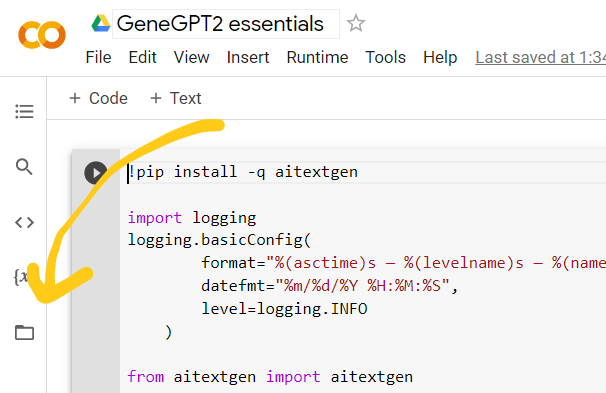

**Upload data from the GeneGPT2 github repo at (GeneGPT2/data) by dragging it into the window**

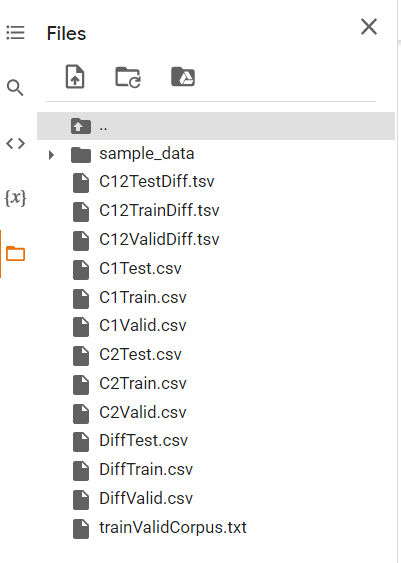

**Run the rest of the cells**

In [ ]:
file_name = "/content/trainValidCorpus.txt"

In [ ]:
train_tokenizer(file_name)

**The configuration for the model is set in the cell below. The different hyperparameters tested are max_length, which is the context window size, and n_embd, which is the number of embeddings.**

In [ ]:
config = build_gpt2_config(vocab_size=1000, max_length=64, dropout=0.0, n_embd=32, n_layer=8, n_head=8)
config

GPT2Config {
  "activation_function": "gelu_new",
  "attn_pdrop": 0.0,
  "bos_token_id": 0,
  "embd_pdrop": 0.0,
  "eos_token_id": 0,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 64,
  "n_embd": 32,
  "n_head": 8,
  "n_inner": null,
  "n_layer": 8,
  "n_positions": 64,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.0,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.0,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "transformers_version": "4.14.1",
  "use_cache": true,
  "vocab_size": 1000
}

In [ ]:
ai = aitextgen(config=config,
               tokenizer_file="aitextgen.tokenizer.json",
               to_gpu=True)

12/16/2021 06:47:33 — INFO — aitextgen — Constructing model from provided config.
12/16/2021 06:47:33 — INFO — aitextgen — GPT2 loaded with 0M parameters.
12/16/2021 06:47:33 — INFO — aitextgen — Using a custom tokenizer.


In [ ]:
ai.train(file_name,
         line_by_line=False,
         from_cache=False,
         num_steps=1000,
         generate_every=1000,
         save_every=1000,
         save_gdrive=False,
         learning_rate=1e-3,
         batch_size=64,
         )

12/16/2021 06:47:49 — INFO — aitextgen — Loading text from /content/trainValidCorpus.txt with generation length of 64.


  0%|          | 0/800 [00:00<?, ?it/s]

12/16/2021 06:47:49 — INFO — aitextgen.TokenDataset — Encoding 800 sets of tokens from /content/trainValidCorpus.txt.
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:148: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=False)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=False)`.
  f"Setting `Trainer(checkpoint_callback={checkpoint_callback})` is deprecated in v1.5 and will "
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:91: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=20)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refre

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1819: LightningDeprecationWarning: `trainer.progress_bar_dict` is deprecated in v1.5 and will be removed in v1.7. Use `ProgressBarBase.get_metrics` instead.
  "`trainer.progress_bar_dict` is deprecated in v1.5 and will be removed in v1.7."


1,000 steps reached: saving model to /trained_model
1,000 steps reached: generating sample texts.


12/16/2021 06:49:28 — INFO — aitextgen — Saving trained model pytorch_model.bin to /trained_model


 hhhhh hhhhh hhlhh hhlhh hhhhl hmhhm hhmhh hmhhh hhhhm hhhhm hhhhm hhhhh hhhlh hhmhm hhmhh hmmhh hlhhh hlhlm hlhmm hlhmh hmhhh hhhhh hlhmh hlhhm hlhhm hllhh hllmh hmlhm hmlhh hmlhh hlmhh hmhhh hhhhm hllhh hllhh hllhh hmmhh hlhhh hlmhh hhhhh hmhhh hhhhh hhmhh hlhhh hhhhh hhhhh hhhhh hhhhh hhhhh hhhhh hhhmh hhmhh hhhhh hhhhh hhhhh hhhhh hhhhh hhhhh hhhhh hhhhm hhhhh hhhhh hhhhh


In [ ]:
word_embeddings = ai.model.transformer.wte.weight
position_embeddings = ai.model.transformer.wpe.weight

In [ ]:
all_prompts = []
dataPaths = ["C1Test.csv", "C1Train.csv", "C1Valid.csv", "C2Test.csv", "C2Train.csv", "C2Valid.csv", "DiffTrain.csv", "DiffValid.csv", "DiffTest.csv"]
for path in dataPaths:
  all_prompts.append(pd.read_csv("/content/" + path, delimiter='\t', header=None))

In [ ]:
for i in range(len(all_prompts)):
  embedded = []
  for prompt in all_prompts[i][0]:
    tokens = ai.tokenizer(text=prompt, return_tensors="pt")["input_ids"][0].numpy()[0:207]
    w_embedding = []
    for token in tokens:
      w_embedding.append(word_embeddings[token].cpu().detach().numpy())
    w_embedding = np.asarray(w_embedding).flatten()

    
    embedded.append(w_embedding)
  embedded = np.asarray(embedded)

  np.savetxt("/content/" + dataPaths[i][:-4] + "Embeddings.csv", 
          embedded,
          delimiter =", ", 
          fmt ='% s')


In [ ]:
types = ["raw_c", "raw_d", "raw"]
for dataset_type in types:
  # read base data
  X_train, y_train, X_test, y_test = None, None, None, None
  Xc_train, Xc_test = None, None
  Xd_train, Xd_test = None, None

  # Get labels (same across all datasets)
  test_diff_df = pd.read_csv("/content/C12TestDiff.tsv",
                            delimiter='\t', header=None)
  train_diff_df = pd.read_csv(
      "/content/C12TrainDiff.tsv", delimiter='\t', header=None)
  valid_diff_df = pd.read_csv(
      "/content/C12ValidDiff.tsv", delimiter='\t', header=None)

  y_test = test_diff_df
  y_train = pd.concat([train_diff_df, valid_diff_df])

  # Get features
  if dataset_type == "raw_c" or dataset_type == "raw":
      c1_test_df = pd.read_csv("/content/C1TestEmbeddings.csv", header=None)
      c1_train_df = pd.read_csv("/content/C1TrainEmbeddings.csv", header=None)
      c1_valid_df = pd.read_csv("/content/C1ValidEmbeddings.csv", header=None)

      c2_test_df = pd.read_csv("/content/C2TestEmbeddings.csv", header=None)
      c2_train_df = pd.read_csv("/content/C2TrainEmbeddings.csv", header=None)
      c2_valid_df = pd.read_csv("/content/C2ValidEmbeddings.csv", header=None)

      c12_train_df = pd.concat([c1_train_df, c2_train_df], axis=1)
      c12_valid_df = pd.concat([c1_valid_df, c2_valid_df], axis=1)

      # Reset index prevents errors from combining Xd_train and Xc_train.
      # Unless you specify drop=True, it creates a new column that stores indices
      # We don't want this, because it essentially adds another feature that's just id
      Xc_train = pd.concat([c12_train_df, c12_valid_df]).reset_index(drop=True)
      Xc_test = pd.concat([c1_test_df, c2_test_df], axis=1)

  if dataset_type == "raw_d" or dataset_type == "raw":
      diff_train = pd.read_csv("/content/DiffTrainEmbeddings.csv", header=None)
      diff_valid = pd.read_csv("/content/DiffValidEmbeddings.csv", header=None)

      # Reset index prevents errors from combining Xd_train and Xc_train.
      # Unless you specify drop=True, it creates a new column that stores indices
      # We don't want this, because it essentially adds another feature that's just id
      Xd_train = pd.concat([diff_train, diff_valid]).reset_index(drop=True)
      Xd_test = pd.read_csv("/content/DiffTestEmbeddings.csv", header=None)

  if dataset_type == "raw_c":
      X_train = Xc_train
      X_test = Xc_test

  if dataset_type == "raw_d":
      X_train = Xd_train
      X_test = Xd_test

  if dataset_type == "raw":
      # print("len", len(Xc_train.columns), len(Xd_train.columns))
      X_train = pd.concat([Xc_train, Xd_train], axis=1)
      X_test = pd.concat([Xc_test, Xd_test], axis=1)

  X_train.columns = [i for i in range(len(X_train.columns))]
  y_train.columns = [i for i in range(len(y_train.columns))]
  X_test.columns = [i for i in range(len(X_test.columns))]
  y_test.columns = [i for i in range(len(y_test.columns))]

  model = XGBRegressor(random_state=0)
  model.fit(X_train, y_train)

  score = model.score(X_test, y_test)

  ypred = model.predict(X_test)

  R, p = scipy.stats.pearsonr(np.squeeze(y_test), np.squeeze(ypred))
  MSE = metrics.mean_squared_error(y_test, ypred)

  print("Dataset results for type ", dataset_type)
  print("XGBoost regressor score: ", score)
  print("R:", R)
  print("p:", p)
  print("MSE:", MSE)

[06:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Dataset results for type  raw_c
XGBoost regressor score:  0.28201082850692405
R: 0.5391511721771843
p: 1.775568908517161e-16
MSE: 4.968797381393002
[06:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Dataset results for type  raw_d
XGBoost regressor score:  0.24842965203177847
R: 0.5079243168840775
p: 1.629130480824839e-14
MSE: 5.20119372991566
[06:50:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Dataset results for type  raw
XGBoost regressor score:  0.2895696611845281
R: 0.5439136609038253
p: 8.547554342330044e-17
MSE: 4.916486971283664
